Peter Gansallo
Independent Study

## What correlations are there between sports activity/ and mental health in school?

In [125]:
# Import the libraries
import numpy as np                  # Numerical Python
import pandas as pd                 # Data Analysis
import matplotlib.pyplot as plt     # Plotting
import seaborn as sns               # Statistical Data Visualization

# Let's make sure pandas returns all the rows and columns for the dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Force pandas to display full numbers instead of scientific notation
#pd.options.display.float_format = '{:.0f}'.format

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Look at the datasets
Downloaded datsets from Kaggle
https://www.kaggle.com/datasets/willianoliveiragibin/student-mental?resource=download
and
https://www.kaggle.com/datasets/thedevastator/school-student-health-and-wellbeing

In [127]:
mental = pd.read_csv("MentalHealthSurvey_new.csv")
mental_other = pd.read_csv("school-survey-2018-19-1.csv")
mental_header = pd.read_csv("MentalHealthSurvey_new.csv", header = 1)

In [128]:
mental.head()

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,average_sleep,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Female,17,PU,Undergraduate,Computer Science,1st year,3.5-4.0,On-Campus,No,No Sports,4-6 hrs,4,5,5,5,1,5,5,5,3,Sleep
1,Female,17,PU,Undergraduate,Computer Science,1st year,3.5-4.0,On-Campus,No,No Sports,4-6 hrs,4,4,4,5,3,4,4,5,2,Religious Activities
2,Male,17,PU,Undergraduate,Information Technology,1st year,0.0-0.0,Off-Campus,No,7+ times,7-8 hrs,3,5,5,1,3,4,4,4,5,Outdoor Activities
3,Male,18,PU,Undergraduate,Data Science,1st year,2.5-3.0,Off-Campus,No,4-6 times,4-6 hrs,4,3,4,4,4,3,4,4,2,"Sports and Fitness, Creative Outlets, Online E..."
4,Male,18,PU,Undergraduate,Data Science,1st year,3.5-4.0,Off-Campus,No,No Sports,7-8 hrs,5,3,1,1,3,1,2,2,1,Sleep


In [129]:
mental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    87 non-null     object
 1   age                       87 non-null     int64 
 2   university                87 non-null     object
 3   degree_level              87 non-null     object
 4   degree_major              87 non-null     object
 5   academic_year             87 non-null     object
 6   cgpa                      87 non-null     object
 7   residential_status        87 non-null     object
 8   campus_discrimination     87 non-null     object
 9   sports_engagement         87 non-null     object
 10  average_sleep             87 non-null     object
 11  study_satisfaction        87 non-null     int64 
 12  academic_workload         87 non-null     int64 
 13  academic_pressure         87 non-null     int64 
 14  financial_concerns        87

In [130]:
mental_other.head()

,index,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,"In a normal week, how often do you have the following (this means not just a snack or a drink)?",Unnamed: 14,"On a normal day, how many portions of the following do you have?",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,How much do you agree or disagree with the following statements?,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,How many minutes a week are you physically active for?,Unnamed: 44,Unnamed: 45,Unnamed: 46,"In the last four weeks, not through school/college, which of the following activities have you done?",Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Does anything stop you from taking part in physical activities?,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,"In the last 12 months, what sports/activities have you done in PE lessons?",Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Has PE encouraged you to do any of the following ….?,Unnamed: 100,Unnamed: 101,What after school clubs would you like school to offer?,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,"In the last 12 months, what sports clubs have you attended outside of school?",Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,What sports/activities have you done in PE lessons?,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,What active/sports clubs at break/lunch time would you like school to offer?,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,What sports clubs have you attended outside of school?,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Which of these describes you?,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,How often have you used each of the following drugs?,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,"How often have 

### Inspect the names of column to ensure proper selection of columns

In [132]:
print(mental_other.columns)

Index(['index', 'Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       ...
       'Unnamed: 558', 'Unnamed: 559', 'Unnamed: 560', 'Unnamed: 561',
       'Unnamed: 562', 'Unnamed: 563', 'Unnamed: 564', 'Unnamed: 565',
       'Unnamed: 566', 'Unnamed: 567'],
      dtype='object', length=569)


In [133]:
# Print column names for ranges of column names we want to keep
print(mental_other.iloc[:, 42:48].columns)
print(mental_other.iloc[:, 124:128].columns)
print(mental_other.iloc[:, 198:206].columns)
print(mental_other.iloc[:, 291:301].columns)

Index(['Unnamed: 41', 'Unnamed: 42',
       'How many minutes a week are you physically active for?  ',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46'],
      dtype='object')
Index(['Unnamed: 123', 'Unnamed: 124', 'Unnamed: 125',
       'In the last 12 months, what sports clubs have you attended outside of school?'],
      dtype='object')
Index(['Unnamed: 197', 'Unnamed: 198', 'Unnamed: 199', 'Unnamed: 200',
       'Unnamed: 201',
       'What sports clubs have you attended outside of school? ',
       'Unnamed: 203', 'Unnamed: 204'],
      dtype='object')
Index(['Unnamed: 290', 'Unnamed: 291', 'How often do you feel the following?',
       'Unnamed: 293', 'Unnamed: 294', 'Unnamed: 295', 'Unnamed: 296',
       'Unnamed: 297',
       'How well do you think you cope with feeling the following?',
       'Unnamed: 299'],
      dtype='object')


## Clean the data
Select columns to keep

In [135]:
# List of specific columns to keep
columns_to_keep = [
    'Unnamed: 3',
    'Unnamed: 4',    # gender
    'Unnamed: 6',    # race
    'Unnamed: 8',    # housing
    'Unnamed: 42',   # social media
    'How many minutes a week are you physically active for?  ',
    'Unnamed: 45',
    'Unnamed: 51',
    'Unnamed: 98',
    'In the last 12 months, what sports clubs have you attended outside of school?',
    'Unnamed: 174',
    'What sports clubs have you attended outside of school? ',
    'How often do you feel the following?',
    'How well do you think you cope with feeling the following?',
    'Unnamed: 320',  # self-harm
    'Unnamed: 338'   # social, emotional, or mental health problem
]

# Correcting ranges for 0-based indexing
ranges_to_keep = (
    list(range(127, 147))  # Unnamed: 128-147
    + list(range(203, 224))  # Unnamed: 203-223
    + list(range(293, 298))  # Unnamed: 293-297
    + list(range(299, 302))  # Unnamed: 300-301
)

# Combine all columns to keep
columns_to_keep += [f'Unnamed: {i}' for i in ranges_to_keep]

# Filter the DataFrame
filtered_df = mental_other[columns_to_keep]


In [136]:
filtered_df.head(25)

,Unnamed: 3,Unnamed: 4,Unnamed: 6,Unnamed: 8,Unnamed: 42,How many minutes a week are you physically active for?,Unnamed: 45,Unnamed: 51,Unnamed: 98,"In the last 12 months, what sports clubs have you attended outside of school?",Unnamed: 174,What sports clubs have you attended outside of school?,How often do you feel the following?,How well do you think you cope with feeling the following?,Unnamed: 320,Unnamed: 338,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 293,Unnamed: 294,Unnamed: 295,Unnamed: 296,Unnamed: 297,Unnamed: 299,Unnamed: 300,Unnamed: 301
0,questionnaire_login_year_group_name,Please select your gender,Which of these describes you?,Where do you live?,"How many minutes a day, do you usually spend s...",Outside of school/college - playing out/recrea...,Outside of school/college - organised sports/d...,In a normal week how many times are you physic...,"In the last 12 months, have you represented sc...",Other,Have you represented school in a sports event?...,Rounders,Sad or upset,Stressed or anxious,Have you ever hurt yourself on purpose? (Often...,"have a social, emotional or mental health problem",Karate,Basketball,Tennis,Athletics,Netball,Rounders,I haven't attended any sports clubs outside of...,Rugby,Running,Skipping,Swimming,Tag Rugby,Dodgeball,Football,Dance,Cycling,Gymnastics,Hockey,Cricket,Judo,Netball,Karate,Judo,Hockey,Gymnastics,Football,Dodgeball,Dance,Cycling,Cricket,Basketball,Athletics,Tennis,Running,Volleyball,Other,I haven't attended any sports clubs outside of...,Skipping,Tag Rugby,Swimming,Rugby,Lonely,Confident,Stressed or anxious,Happy,Bad tempered or angry,Sad or upset,Lonely,Bad tempered or angry
1,Year 11,Female,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),181 - 240 minutes (3 hours 1 minute - 4 hours),60-1 minutes,0 minutes (None),9,No,NaN,NaN,NaN,Some days,Ok,No,No,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some days,Rarely,Most days,Every day,Rarely,Ok,Ok,Ok
2,Year 12,Female,Other Ethnic Group,I live with my parent(s),121 - 180 minutes (2 hours 1 minute - 3 hours),60-1 minutes,0 minutes (None),4,NaN,NaN,NaN,NaN,Most days,Not well,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some days,Some days,Most days,Rarely,Some days,Ok,Ok,Ok
3,Year 12,Male,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),361+ minutes (over 6 hours 1 minute),120-61 minutes,0 minutes (None),1,NaN,NaN,NaN,NaN,Rarely,Ok,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some days,Rarely,Most days,Most days,Some days,Ok,Very well,Not well
4,Year 9,Male,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),1 - 60 minutes (Up to 1 hour),60-1 minutes,241+ minutes,9,Yes,NaN,NaN,NaN,Rarely,Well,No,No,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Never,Some days,Rarely,Most days,Rarely,Well,Well,Ok
5,Year 9,Female,"Asian (Asian British, Indian, Pakistani, Bangl...",I live with my parent(s),61 - 120 minutes (1 hour 1 minute - 2 hours),60-1 minutes,60-1 minutes,5,No,NaN,NaN,NaN,Rarely,Ok,No,"Yes

### Next we want to turn the column "In the last 12 months, what sports clubs have you attended outside of school?" into a categorical variable representing the sports of Unnamed columns 127 through 146

In [138]:
sports_columns = mental_other.iloc[0, 128:148]  # Select the first row and sports columns
sports_names = list(sports_columns.values)  # Convert to a list of sport names
print(sports_names)

['Karate', 'Basketball', 'Tennis', 'Athletics', 'Netball', 'Rounders', "I haven't attended any sports clubs outside of school", 'Rugby', 'Running', 'Skipping', 'Swimming', 'Tag Rugby', 'Dodgeball', 'Football', 'Dance', 'Cycling', 'Gymnastics', 'Hockey', 'Cricket', 'Judo']


Drop the column that represents students that didn't do outside of school sports

In [140]:
filtered_df.drop('Unnamed: 133', axis=1, inplace=True)

In [141]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21955 entries, 0 to 21954
Data columns (total 64 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   Unnamed: 3                                                                     21955 non-null  object
 1   Unnamed: 4                                                                     21955 non-null  object
 2   Unnamed: 6                                                                     18032 non-null  object
 3   Unnamed: 8                                                                     18098 non-null  object
 4   Unnamed: 42                                                                    18028 non-null  object
 5   How many minutes a week are you physically active for?                         18028 non-null  object
 6   Unnamed: 45                   

## Collapse columns into one categorical column

#### Collapse column for "In the last 12 months, what sports clubs have you attended outside of school?"

In [143]:
# Generate potential column names from range 127 to 147
sports_values = [f'Unnamed: {i}' for i in range(127, 147)]
dict_sport_values = dict()
for val in sports_values:
    if val in filtered_df.columns:
        dict_sport_values[val] = filtered_df[val].tolist()
    
club_last12 = dict()

# Match values in sports column "In the last 12 months, what sports clubs have you attended outside of school?"
for key, val in dict_sport_values.items():  # go through sports dictionary
    sport_name = ""
    
    for index,row_val in enumerate(val):
        if row_val == "X":  # check if the person played this specific sport
            if index not in club_last12:  
                club_last12[index] = [val[0]] # Add the sport name
            else:
                club_last12[index].append(val[0])

# Reassign the column values with the collapsed values
filtered_df["In the last 12 months, what sports clubs have you attended outside of school?"] = np.nan

# Populate the new column using the dictionary
for index, sports in club_last12.items():
    filtered_df.at[index, "In the last 12 months, what sports clubs have you attended outside of school?"] = ", ".join(sports)   



In [144]:
filtered_df.head(10)

,Unnamed: 3,Unnamed: 4,Unnamed: 6,Unnamed: 8,Unnamed: 42,How many minutes a week are you physically active for?,Unnamed: 45,Unnamed: 51,Unnamed: 98,"In the last 12 months, what sports clubs have you attended outside of school?",Unnamed: 174,What sports clubs have you attended outside of school?,How often do you feel the following?,How well do you think you cope with feeling the following?,Unnamed: 320,Unnamed: 338,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 293,Unnamed: 294,Unnamed: 295,Unnamed: 296,Unnamed: 297,Unnamed: 299,Unnamed: 300,Unnamed: 301
0,questionnaire_login_year_group_name,Please select your gender,Which of these describes you?,Where do you live?,"How many minutes a day, do you usually spend s...",Outside of school/college - playing out/recrea...,Outside of school/college - organised sports/d...,In a normal week how many times are you physic...,"In the last 12 months, have you represented sc...",NaN,Have you represented school in a sports event?...,Rounders,Sad or upset,Stressed or anxious,Have you ever hurt yourself on purpose? (Often...,"have a social, emotional or mental health problem",Karate,Basketball,Tennis,Athletics,Netball,Rounders,Rugby,Running,Skipping,Swimming,Tag Rugby,Dodgeball,Football,Dance,Cycling,Gymnastics,Hockey,Cricket,Judo,Netball,Karate,Judo,Hockey,Gymnastics,Football,Dodgeball,Dance,Cycling,Cricket,Basketball,Athletics,Tennis,Running,Volleyball,Other,I haven't attended any sports clubs outside of...,Skipping,Tag Rugby,Swimming,Rugby,Lonely,Confident,Stressed or anxious,Happy,Bad tempered or angry,Sad or upset,Lonely,Bad tempered or angry
1,Year 11,Female,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),181 - 240 minutes (3 hours 1 minute - 4 hours),60-1 minutes,0 minutes (None),9,No,NaN,NaN,NaN,Some days,Ok,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some days,Rarely,Most days,Every day,Rarely,Ok,Ok,Ok
2,Year 12,Female,Other Ethnic Group,I live with my parent(s),121 - 180 minutes (2 hours 1 minute - 3 hours),60-1 minutes,0 minutes (None),4,NaN,NaN,NaN,NaN,Most days,Not well,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some days,Some days,Most days,Rarely,Some days,Ok,Ok,Ok
3,Year 12,Male,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),361+ minutes (over 6 hours 1 minute),120-61 minutes,0 minutes (None),1,NaN,NaN,NaN,NaN,Rarely,Ok,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some days,Rarely,Most days,Most days,Some days,Ok,Very well,Not well
4,Year 9,Male,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),1 - 60 minutes (Up to 1 hour),60-1 minutes,241+ minutes,9,Yes,Basketball,NaN,NaN,Rarely,Well,No,No,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Never,Some days,Rarely,Most days,Rarely,Well,Well,Ok
5,Year 9,Female,"Asian (Asian British, Indian, Pakistani, Bangl...",I live with my parent(s),61 - 120 minutes (1 hour 1 minute - 2 hours),60-1 minutes,60-1 minutes,5,No,"Basketball, Netball, Rounders, Dodgeball",NaN,NaN,Rarely,Ok,No,"Yes, some days",NaN,X,NaN,NaN,X,X,Na

#### "What sports clubs have you attended outside of school?"

In [146]:
# Generate potential column names from unnamed 203 to unnamed 223
sports_values = [f'Unnamed: {i}' for i in range(203, 224)]
dict_sport_values = dict()
for val in sports_values:
    if val in filtered_df.columns:
        dict_sport_values[val] = filtered_df[val].tolist()
    
club = dict()

# Match values in sports column What sports clubs have you attended outside of school?"
for key, val in dict_sport_values.items():  # go through sports dictionary
    sport_name = ""
    
    for index,row_val in enumerate(val):
        if row_val == "X":  # check if the person played this specific sport
            if index not in club:  
                club[index] = [val[0]] # Add the sport name
            else:
                club[index].append(val[0])

# Reassign the column values with the collapsed values
filtered_df['What sports clubs have you attended outside of school? '] = np.nan


# Populate the new column using the dictionary
for index, sports in club.items():       
    filtered_df.at[index, 'What sports clubs have you attended outside of school? '] = ", ".join(sports)

print(filtered_df['What sports clubs have you attended outside of school? '].unique())



[nan "I haven't attended any sports clubs outside of school"
 'Karate, Dance, Swimming' 'Dance' 'Football' 'Swimming'
 'Football, Dodgeball' 'Cycling' 'Cricket' 'Rugby' 'Basketball'
 'Cricket, Swimming' 'Athletics'
 'Football, Dodgeball, Cricket, Basketball' 'Other'
 'Karate, Football, Cricket, Basketball, Running, Other, Tag Rugby, Swimming'
 "Football, I haven't attended any sports clubs outside of school"
 'Karate, Dodgeball, Dance, Cycling, Athletics, Running, Volleyball, Other, Tag Rugby, Swimming, Rugby'
 'Karate, Other' 'Football, Other'
 'Gymnastics, Football, Basketball, Rugby'
 'Netball, Football, Tennis, Swimming, Rugby' 'Dodgeball']


In [147]:
filtered_df.head(10)

,Unnamed: 3,Unnamed: 4,Unnamed: 6,Unnamed: 8,Unnamed: 42,How many minutes a week are you physically active for?,Unnamed: 45,Unnamed: 51,Unnamed: 98,"In the last 12 months, what sports clubs have you attended outside of school?",Unnamed: 174,What sports clubs have you attended outside of school?,How often do you feel the following?,How well do you think you cope with feeling the following?,Unnamed: 320,Unnamed: 338,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 293,Unnamed: 294,Unnamed: 295,Unnamed: 296,Unnamed: 297,Unnamed: 299,Unnamed: 300,Unnamed: 301
0,questionnaire_login_year_group_name,Please select your gender,Which of these describes you?,Where do you live?,"How many minutes a day, do you usually spend s...",Outside of school/college - playing out/recrea...,Outside of school/college - organised sports/d...,In a normal week how many times are you physic...,"In the last 12 months, have you represented sc...",NaN,Have you represented school in a sports event?...,NaN,Sad or upset,Stressed or anxious,Have you ever hurt yourself on purpose? (Often...,"have a social, emotional or mental health problem",Karate,Basketball,Tennis,Athletics,Netball,Rounders,Rugby,Running,Skipping,Swimming,Tag Rugby,Dodgeball,Football,Dance,Cycling,Gymnastics,Hockey,Cricket,Judo,Netball,Karate,Judo,Hockey,Gymnastics,Football,Dodgeball,Dance,Cycling,Cricket,Basketball,Athletics,Tennis,Running,Volleyball,Other,I haven't attended any sports clubs outside of...,Skipping,Tag Rugby,Swimming,Rugby,Lonely,Confident,Stressed or anxious,Happy,Bad tempered or angry,Sad or upset,Lonely,Bad tempered or angry
1,Year 11,Female,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),181 - 240 minutes (3 hours 1 minute - 4 hours),60-1 minutes,0 minutes (None),9,No,NaN,NaN,NaN,Some days,Ok,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some days,Rarely,Most days,Every day,Rarely,Ok,Ok,Ok
2,Year 12,Female,Other Ethnic Group,I live with my parent(s),121 - 180 minutes (2 hours 1 minute - 3 hours),60-1 minutes,0 minutes (None),4,NaN,NaN,NaN,NaN,Most days,Not well,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some days,Some days,Most days,Rarely,Some days,Ok,Ok,Ok
3,Year 12,Male,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),361+ minutes (over 6 hours 1 minute),120-61 minutes,0 minutes (None),1,NaN,NaN,NaN,NaN,Rarely,Ok,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some days,Rarely,Most days,Most days,Some days,Ok,Very well,Not well
4,Year 9,Male,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),1 - 60 minutes (Up to 1 hour),60-1 minutes,241+ minutes,9,Yes,Basketball,NaN,NaN,Rarely,Well,No,No,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Never,Some days,Rarely,Most days,Rarely,Well,Well,Ok
5,Year 9,Female,"Asian (Asian British, Indian, Pakistani, Bangl...",I live with my parent(s),61 - 120 minutes (1 hour 1 minute - 2 hours),60-1 minutes,60-1 minutes,5,No,"Basketball, Netball, Rounders, Dodgeball",NaN,NaN,Rarely,Ok,No,"Yes, some days",NaN,X,NaN,NaN,X,X,NaN,NaN

### Drop the columns we collapsed

In [149]:
# drop the columns we just collapsed
def collapse(start, end):
    columns_to_drop = []
    for i in range(start,end):
        string = "Unnamed: " + str(i)
        if string in filtered_df.columns:
            columns_to_drop.append(string)
    filtered_df.drop(columns_to_drop, axis=1, inplace=True)

#In a previous code block we put the values of 127 to 147 in on column along with unnamed 203 to 223 column names
collapse(127,147)
collapse(203,224)
#print(columns_to_drop)

In [150]:
filtered_df.head()

,Unnamed: 3,Unnamed: 4,Unnamed: 6,Unnamed: 8,Unnamed: 42,How many minutes a week are you physically active for?,Unnamed: 45,Unnamed: 51,Unnamed: 98,"In the last 12 months, what sports clubs have you attended outside of school?",Unnamed: 174,What sports clubs have you attended outside of school?,How often do you feel the following?,How well do you think you cope with feeling the following?,Unnamed: 320,Unnamed: 338,Unnamed: 293,Unnamed: 294,Unnamed: 295,Unnamed: 296,Unnamed: 297,Unnamed: 299,Unnamed: 300,Unnamed: 301
0,questionnaire_login_year_group_name,Please select your gender,Which of these describes you?,Where do you live?,"How many minutes a day, do you usually spend s...",Outside of school/college - playing out/recrea...,Outside of school/college - organised sports/d...,In a normal week how many times are you physic...,"In the last 12 months, have you represented sc...",NaN,Have you represented school in a sports event?...,NaN,Sad or upset,Stressed or anxious,Have you ever hurt yourself on purpose? (Often...,"have a social, emotional or mental health problem",Lonely,Confident,Stressed or anxious,Happy,Bad tempered or angry,Sad or upset,Lonely,Bad tempered or angry
1,Year 11,Female,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),181 - 240 minutes (3 hours 1 minute - 4 hours),60-1 minutes,0 minutes (None),9,No,NaN,NaN,NaN,Some days,Ok,No,No,Some days,Rarely,Most days,Every day,Rarely,Ok,Ok,Ok
2,Year 12,Female,Other Ethnic Group,I live with my parent(s),121 - 180 minutes (2 hours 1 minute - 3 hours),60-1 minutes,0 minutes (None),4,NaN,NaN,NaN,NaN,Most days,Not well,No,No,Some days,Some days,Most days,Rarely,Some days,Ok,Ok,Ok
3,Year 12,Male,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),361+ minutes (over 6 hours 1 minute),120-61 minutes,0 minutes (None),1,NaN,NaN,NaN,NaN,Rarely,Ok,No,No,Some days,Rarely,Most days,Most days,Some days,Ok,Very well,Not well
4,Year 9,Male,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),1 - 60 minutes (Up to 1 hour),60-1 minutes,241+ minutes,9,Yes,Basketball,NaN,NaN,Rarely,Well,No,No,Never,Some days,Rarely,Most days,Rarely,Well,Well,Ok


### Clean and correct the header names
Correct all the column names for the column names where it starts with Unnamed

In [152]:
#Fix headers
for index, colname in enumerate(filtered_df.columns):
    if 'Unnamed' in colname:
        filtered_df.rename(columns={colname:filtered_df.iloc[0,index]}, inplace=True)
        #then set value of first row to null
        

In [153]:
filtered_df.head()

,questionnaire_login_year_group_name,Please select your gender,Which of these describes you?,Where do you live?,"How many minutes a day, do you usually spend sitting down watching TV/playing computer games/using the internet/using a mobile phone?",How many minutes a week are you physically active for?,"Outside of school/college - organised sports/dance (e.g. football, rugby, cricket, dance, Zumba, gymnastics, cycling, martial arts)",In a normal week how many times are you physically active for 30 minutes or more?,"In the last 12 months, have you represented school in a sports event? (e.g. Football, Multi-skills, Netball, Dance competition)","In the last 12 months, what sports clubs have you attended outside of school?","Have you represented school in a sports event? (e.g. Football, Multi skills, Netball, Dance competition)",What sports clubs have you attended outside of school?,How often do you feel the following?,How well do you think you cope with feeling the following?,Have you ever hurt yourself on purpose? (Often referred to as ‘self-harm’),"have a social, emotional or mental health problem",Lonely,Confident,Stressed or anxious,Happy,Bad tempered or angry,Sad or upset,Lonely,Bad tempered or angry
0,questionnaire_login_year_group_name,Please select your gender,Which of these describes you?,Where do you live?,"How many minutes a day, do you usually spend s...",Outside of school/college - playing out/recrea...,Outside of school/college - organised sports/d...,In a normal week how many times are you physic...,"In the last 12 months, have you represented sc...",NaN,Have you represented school in a sports event?...,NaN,Sad or upset,Stressed or anxious,Have you ever hurt yourself on purpose? (Often...,"have a social, emotional or mental health problem",Lonely,Confident,Stressed or anxious,Happy,Bad tempered or angry,Sad or upset,Lonely,Bad tempered or angry
1,Year 11,Female,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),181 - 240 minutes (3 hours 1 minute - 4 hours),60-1 minutes,0 minutes (None),9,No,NaN,NaN,NaN,Some days,Ok,No,No,Some days,Rarely,Most days,Every day,Rarely,Ok,Ok,Ok
2,Year 12,Female,Other Ethnic Group,I live with my parent(s),121 - 180 minutes (2 hours 1 minute - 3 hours),60-1 minutes,0 minutes (None),4,NaN,NaN,NaN,NaN,Most days,Not well,No,No,Some days,Some days,Most days,Rarely,Some days,Ok,Ok,Ok
3,Year 12,Male,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),361+ minutes (over 6 hours 1 minute),120-61 minutes,0 minutes (None),1,NaN,NaN,NaN,NaN,Rarely,Ok,No,No,Some days,Rarely,Most days,Most days,Some days,Ok,Very well,Not well
4,Year 9,Male,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),1 - 60 minutes (Up to 1 hour),60-1 minutes,241+ minutes,9,Yes,Basketball,NaN,NaN,Rarely,Well,No,No,Never,Some days,Rarely,Most days,Rarely,Well,Well,Ok


#### Clean up follow up question columns
Noticed that the columns that have the keyword "how" in the column name have follow question in the first row
So I'm going to clean up the ones I didn't clean already

In [155]:
for index,colname in enumerate(filtered_df.columns):
    if 'how' in colname.lower():
        if colname != filtered_df.iloc[0,index]: #if column name doesn't match first row it means we didn't clean that column yet
            filtered_df.rename(columns={colname:filtered_df.iloc[0,index]},inplace=True)

Check if there are no more follow up questions as the column name

In [157]:
filtered_df.head()

,questionnaire_login_year_group_name,Please select your gender,Which of these describes you?,Where do you live?,"How many minutes a day, do you usually spend sitting down watching TV/playing computer games/using the internet/using a mobile phone?",Outside of school/college - playing out/recreational,"Outside of school/college - organised sports/dance (e.g. football, rugby, cricket, dance, Zumba, gymnastics, cycling, martial arts)",In a normal week how many times are you physically active for 30 minutes or more?,"In the last 12 months, have you represented school in a sports event? (e.g. Football, Multi-skills, Netball, Dance competition)","In the last 12 months, what sports clubs have you attended outside of school?","Have you represented school in a sports event? (e.g. Football, Multi skills, Netball, Dance competition)",What sports clubs have you attended outside of school?,Sad or upset,Stressed or anxious,Have you ever hurt yourself on purpose? (Often referred to as ‘self-harm’),"have a social, emotional or mental health problem",Lonely,Confident,Stressed or anxious,Happy,Bad tempered or angry,Sad or upset,Lonely,Bad tempered or angry
0,questionnaire_login_year_group_name,Please select your gender,Which of these describes you?,Where do you live?,"How many minutes a day, do you usually spend s...",Outside of school/college - playing out/recrea...,Outside of school/college - organised sports/d...,In a normal week how many times are you physic...,"In the last 12 months, have you represented sc...",NaN,Have you represented school in a sports event?...,NaN,Sad or upset,Stressed or anxious,Have you ever hurt yourself on purpose? (Often...,"have a social, emotional or mental health problem",Lonely,Confident,Stressed or anxious,Happy,Bad tempered or angry,Sad or upset,Lonely,Bad tempered or angry
1,Year 11,Female,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),181 - 240 minutes (3 hours 1 minute - 4 hours),60-1 minutes,0 minutes (None),9,No,NaN,NaN,NaN,Some days,Ok,No,No,Some days,Rarely,Most days,Every day,Rarely,Ok,Ok,Ok
2,Year 12,Female,Other Ethnic Group,I live with my parent(s),121 - 180 minutes (2 hours 1 minute - 3 hours),60-1 minutes,0 minutes (None),4,NaN,NaN,NaN,NaN,Most days,Not well,No,No,Some days,Some days,Most days,Rarely,Some days,Ok,Ok,Ok
3,Year 12,Male,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),361+ minutes (over 6 hours 1 minute),120-61 minutes,0 minutes (None),1,NaN,NaN,NaN,NaN,Rarely,Ok,No,No,Some days,Rarely,Most days,Most days,Some days,Ok,Very well,Not well
4,Year 9,Male,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),1 - 60 minutes (Up to 1 hour),60-1 minutes,241+ minutes,9,Yes,Basketball,NaN,NaN,Rarely,Well,No,No,Never,Some days,Rarely,Most days,Rarely,Well,Well,Ok


Drop the first row in the dataframe as they no longer have value in the cleanup process

In [159]:
filtered_df = filtered_df.drop(index=0).reset_index(drop=True)


#### Final Column name cleanup
Make a list of the new column names in the order current column names and then store the old and new values in a dictionary

In [161]:
df_new_names = ['year_in_school', 'gender_identity', 'race_ethnicity', 'living_situation', 'screen_time', 'weekly_active_min','organized_club_min', 'weekly_active_frequency','rep_school_past_year', 'sports_done_past_year', 'rep_school_ever','sports_done_ever','feel_sad_upset', 'cope_stress_anxious','self_harm','social_emotion_mental_health_problem','feel_lonely','feel_confident','feel_stress_anxious','feel_happy','feel_angry','cope_lonely','cope_sad_upset','cope_angry']
new_col_names = dict()
#make the new column names the key, and the old values the value to access the former names if we're confused
for index,colname in enumerate(filtered_df.columns):
    filtered_df.rename(columns={colname:df_new_names[index]},inplace=True)
    new_col_names[df_new_names[index]] = colname


In [162]:
filtered_df.head()

,year_in_school,gender_identity,race_ethnicity,living_situation,screen_time,weekly_active_min,organized_club_min,weekly_active_frequency,rep_school_past_year,sports_done_past_year,rep_school_ever,sports_done_ever,feel_sad_upset,cope_stress_anxious,self_harm,social_emotion_mental_health_problem,feel_lonely,feel_confident,cope_stress_anxious,feel_happy,feel_angry,feel_sad_upset,feel_lonely,feel_angry
0,Year 11,Female,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),181 - 240 minutes (3 hours 1 minute - 4 hours),60-1 minutes,0 minutes (None),9,No,NaN,NaN,NaN,Some days,Ok,No,No,Some days,Rarely,Most days,Every day,Rarely,Ok,Ok,Ok
1,Year 12,Female,Other Ethnic Group,I live with my parent(s),121 - 180 minutes (2 hours 1 minute - 3 hours),60-1 minutes,0 minutes (None),4,NaN,NaN,NaN,NaN,Most days,Not well,No,No,Some days,Some days,Most days,Rarely,Some days,Ok,Ok,Ok
2,Year 12,Male,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),361+ minutes (over 6 hours 1 minute),120-61 minutes,0 minutes (None),1,NaN,NaN,NaN,NaN,Rarely,Ok,No,No,Some days,Rarely,Most days,Most days,Some days,Ok,Very well,Not well
3,Year 9,Male,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),1 - 60 minutes (Up to 1 hour),60-1 minutes,241+ minutes,9,Yes,Basketball,NaN,NaN,Rarely,Well,No,No,Never,Some days,Rarely,Most days,Rarely,Well,Well,Ok
4,Year 9,Female,"Asian (Asian British, Indian, Pakistani, Bangl...",I live with my parent(s),61 - 120 minutes (1 hour 1 minute - 2 hours),60-1 minutes,60-1 minutes,5,No,"Basketball, Netball, Rounders, Dodgeball",NaN,NaN,Rarely,Ok,No,"Yes, some days",Rarely,Most days,Some days,Most days,Some days,Ok,Well,Ok


### Take a Look and handle NaN values

In [164]:
null_count = filtered_df.isna().sum()
filtered_df.info()
print(null_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21954 entries, 0 to 21953
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   year_in_school                        21954 non-null  object
 1   gender_identity                       21954 non-null  object
 2   race_ethnicity                        18031 non-null  object
 3   living_situation                      18097 non-null  object
 4   screen_time                           18027 non-null  object
 5   weekly_active_min                     18027 non-null  object
 6   organized_club_min                    18027 non-null  object
 7   weekly_active_frequency               18028 non-null  object
 8   rep_school_past_year                  21241 non-null  object
 9   sports_done_past_year                 14731 non-null  object
 10  rep_school_ever                       67 non-null     object
 11  sports_done_ever            

Dropping rep school ever and sports done ever column as there are too many missing data points which doesn't make sense
filling sports done past year with "None" for the values that are null which would make sense because it seems the trued average missing data is about 3900

In [166]:
filtered_df.drop(columns=['rep_school_ever', 'sports_done_ever'], inplace=True)
filtered_df['sports_done_past_year'].fillna('None', inplace=True)
filtered_df['self_harm'].fillna('TBD', inplace=True)#Don't know what do do yet with these column

Check updated null status

In [168]:
null_count = filtered_df.isna().sum()
print(null_count)

year_in_school                             0
gender_identity                            0
race_ethnicity                          3923
living_situation                        3857
screen_time                             3927
weekly_active_min                       3927
organized_club_min                      3927
weekly_active_frequency                 3926
rep_school_past_year                     713
sports_done_past_year                      0
feel_sad_upset                          3927
cope_stress_anxious                     3929
self_harm                                  0
social_emotion_mental_health_problem    3929
feel_lonely                             3927
feel_confident                          3927
cope_stress_anxious                     3927
feel_happy                              3927
feel_angry                              3927
feel_sad_upset                          3929
feel_lonely                             3929
feel_angry                              3929
dtype: int

This is about 20% of the 22000 entries we have and the missing values look consistent across column so we're going to drop all null rows

In [170]:
filtered_df.dropna(inplace=True)

### Inspect cleaned data
first 25 rows

In [172]:
filtered_df.head(25)

,year_in_school,gender_identity,race_ethnicity,living_situation,screen_time,weekly_active_min,organized_club_min,weekly_active_frequency,rep_school_past_year,sports_done_past_year,feel_sad_upset,cope_stress_anxious,self_harm,social_emotion_mental_health_problem,feel_lonely,feel_confident,cope_stress_anxious,feel_happy,feel_angry,feel_sad_upset,feel_lonely,feel_angry
0,Year 11,Female,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),181 - 240 minutes (3 hours 1 minute - 4 hours),60-1 minutes,0 minutes (None),9,No,None,Some days,Ok,No,No,Some days,Rarely,Most days,Every day,Rarely,Ok,Ok,Ok
3,Year 9,Male,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),1 - 60 minutes (Up to 1 hour),60-1 minutes,241+ minutes,9,Yes,Basketball,Rarely,Well,No,No,Never,Some days,Rarely,Most days,Rarely,Well,Well,Ok
4,Year 9,Female,"Asian (Asian British, Indian, Pakistani, Bangl...",I live with my parent(s),61 - 120 minutes (1 hour 1 minute - 2 hours),60-1 minutes,60-1 minutes,5,No,"Basketball, Netball, Rounders, Dodgeball",Rarely,Ok,No,"Yes, some days",Rarely,Most days,Some days,Most days,Some days,Ok,Well,Ok
6,Year 11,Female,Other Ethnic Group,I live with my parent(s),121 - 180 minutes (2 hours 1 minute - 3 hours),0 minutes (None),0 minutes (None),1,No,None,Most days,Not well at all,Yes,No,Some days,Rarely,Every day,Rarely,Some days,Not well at all,Ok,Not well
7,Year 9,Male,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),181 - 240 minutes (3 hours 1 minute - 4 hours),60-1 minutes,60-1 minutes,4,No,None,Some days,Well,No,No,Rarely,Every day,Some days,Every day,Most days,Ok,Well,Not well
8,Year 11,Female,"Mixed (White and Black Caribbean, White and Bl...",I live with my parent(s),241 - 300 minutes (4 hours 1 minute - 5 hours),120-61 minutes,180-121 minutes,3,No,Football,Most days,Not well at all,No,"Yes, most days",Never,Some days,Every day,Some days,Some days,Not well,Very well,Ok
9,Year 11,Female,"Black (Black British, Black Caribbean, Black A...",I live with my parent(s),301 - 360 minutes (5 hours 1 minute - 6 hours),0 minutes (None),60-1 minutes,3,No,None,Most days,Well,No,No,Rarely,Some days,Most days,Some days,Rarely,Well,Well,Well
10,Year 11,Female,"Black (Black British, Black Caribbean, Black A...",I live with my parent(s),181 - 240 minutes (3 hours 1 minute - 4 hours),120-61 minutes,180-121 minutes,8,No,"Running, Swimming",Rarely,Ok,No,No,Never,Some days,Most days,Most days,Some days,Ok,Very well,Not well
11,Year 11,Female,"Black (Black British, Black Caribbean, Black A...",I live with my parent(s),361+ minutes (over 6 hours 1 minute),0 minutes (None),0 minutes (None),8,No,Dance,Most days,Not well at all,No,"Yes, some days",Most days,Most days,Every day,Rarely,Rarely,Not well at all,Ok,Not well at all
12,Year 11,Female,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),1 - 60 minutes (Up to 1 hour),120-61 minutes,240-181 minutes,8,No,Gymnastics,Every day,Not well,Yes,No,Some days,Rarely,Every day,Some days,Every day,Not well,Not well,Not well


Last 7 rows in dataframe

In [174]:
filtered_df.tail(7)

,year_in_school,gender_identity,race_ethnicity,living_situation,screen_time,weekly_active_min,organized_club_min,weekly_active_frequency,rep_school_past_year,sports_done_past_year,feel_sad_upset,cope_stress_anxious,self_harm,social_emotion_mental_health_problem,feel_lonely,feel_confident,cope_stress_anxious,feel_happy,feel_angry,feel_sad_upset,feel_lonely,feel_angry
21947,Year 5,Female,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),301 - 360 minutes (5 hours 1 minute - 6 hours),180-121 minutes,241+ minutes,14 or more,Yes,"Swimming, Football, Dance",Some days,Very well,TBD,No,Rarely,Most days,Every day,Some days,Some days,Very well,Very well,Very well
21948,Year 5,Female,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),241 - 300 minutes (4 hours 1 minute - 5 hours),241+ minutes,241+ minutes,10,Yes,"Dodgeball, Football",Never,Very well,TBD,No,Never,Every day,Never,Every day,Never,Very well,Very well,Very well
21949,Year 5,Female,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),61 - 120 minutes (1 hour 1 minute - 2 hours),60-1 minutes,241+ minutes,12,Yes,"Dance, Gymnastics",Most days,Very well,TBD,No,Never,Some days,Never,Some days,Rarely,Not well,Very well,Very well
21950,Year 5,Male,Don’t know / Prefer not to say,I live with someone else,1 - 60 minutes (Up to 1 hour),120-61 minutes,60-1 minutes,14 or more,Yes,"Karate, Judo",Some days,Ok,TBD,No,Some days,Most days,Some days,Most days,Some days,Not well,Not well,Not well
21951,Year 5,Female,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),301 - 360 minutes (5 hours 1 minute - 6 hours),241+ minutes,241+ minutes,14 or more,Yes,Athletics,Most days,Not well at all,TBD,No,Rarely,Never,Never,Rarely,Some days,Not well,Very well,Ok
21952,Year 5,Female,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),181 - 240 minutes (3 hours 1 minute - 4 hours),120-61 minutes,60-1 minutes,14 or more,Yes,Swimming,Some days,Well,TBD,No,Rarely,Every day,Rarely,Every day,Some days,Ok,Very well,Ok
21953,Year 5,Female,"White (British, Irish, Traveller or Irish Heri...",I live with my parent(s),241 - 300 minutes (4 hours 1 minute - 5 hours),0 minutes (None),0 minutes (None),14 or more,No,Gymnastics,Some days,Not well at all,TBD,No,Rarely,Some days,Most days,Some days,Rarely,Ok,Ok,Ok


Export and save csv to laptop

In [176]:
filtered_df.to_csv(
    'cleaned_mental_health.csv', 
    header=True
)


### Proof of function

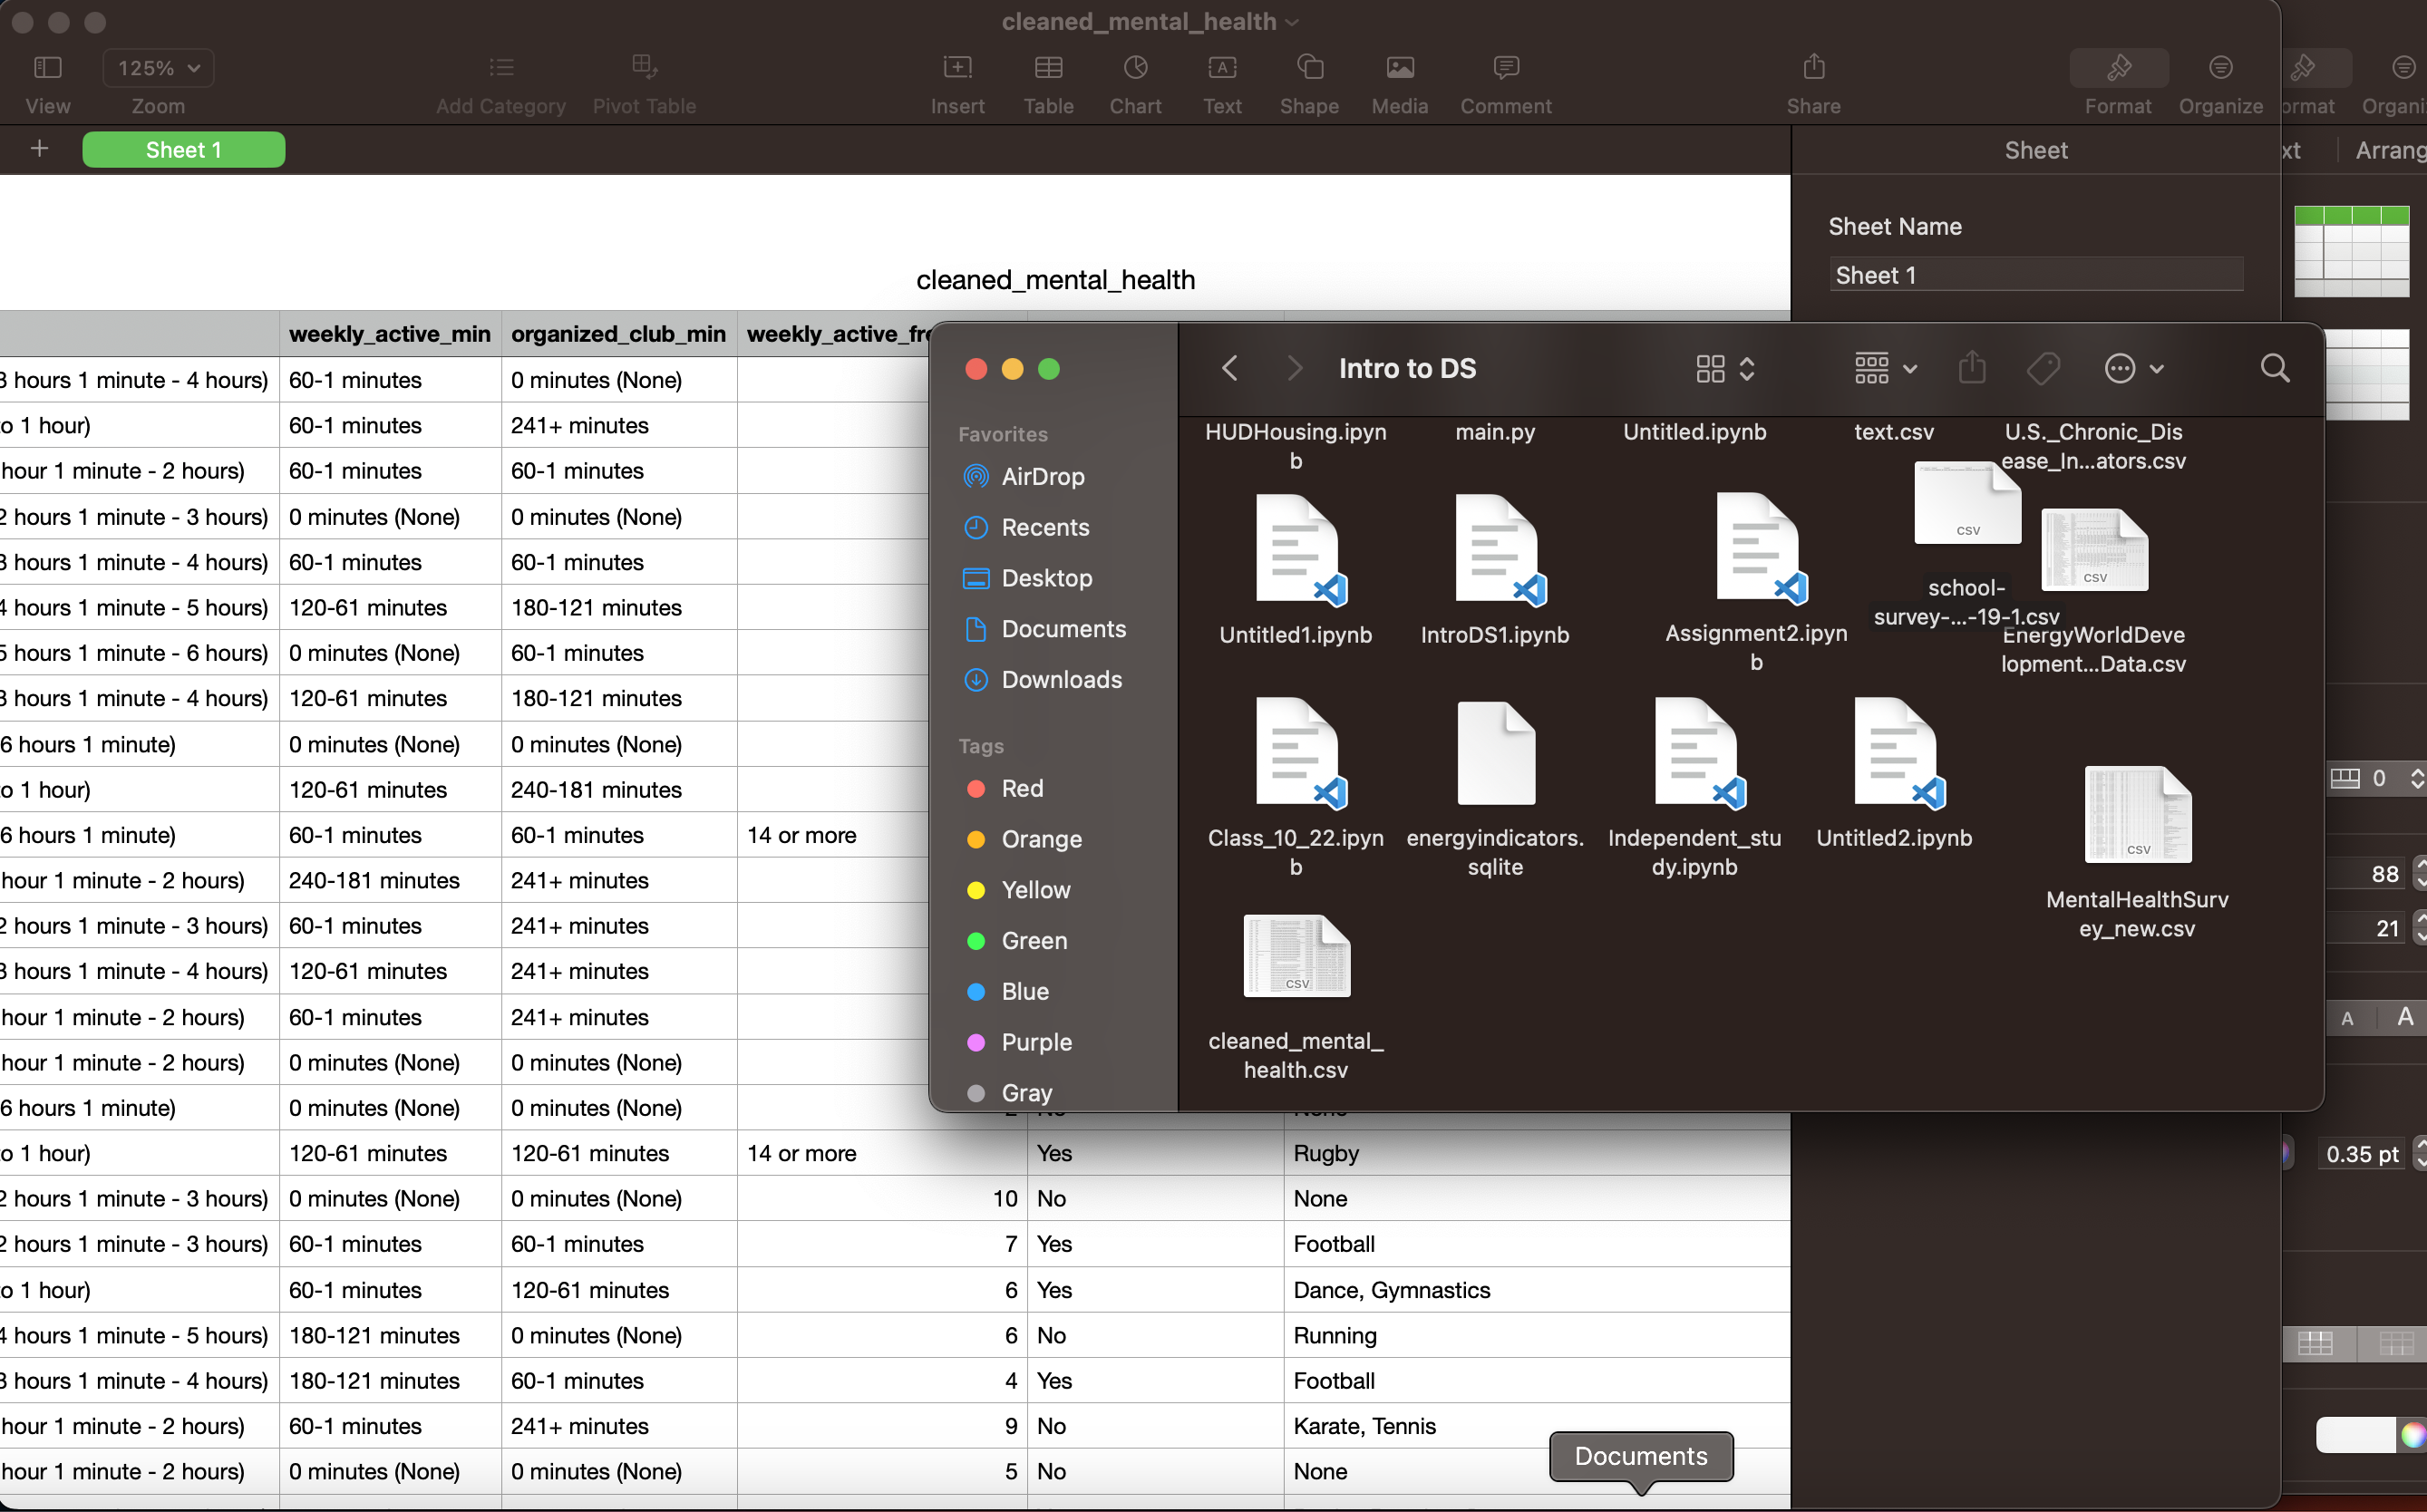